In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Task 2: EDA

In [2]:
train = pd.read_csv('training_set_VU_DM.csv')
test = pd.read_csv('test_set_VU_DM.csv')

In [3]:
train.head(5)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [4]:
train.info()
train.describe()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [5]:
train.dtypes.value_counts()

float64    34
int64      19
object      1
Name: count, dtype: int64

In [6]:
object_cols = train.select_dtypes(include='object').columns
print("Object columns:", object_cols) #date_time

Object columns: Index(['date_time'], dtype='object')


In [7]:
train.prop_location_score1.describe()

count    4.958347e+06
mean     2.872589e+00
std      1.531011e+00
min      0.000000e+00
25%      1.790000e+00
50%      2.770000e+00
75%      4.040000e+00
max      6.980000e+00
Name: prop_location_score1, dtype: float64

<Axes: title={'center': 'Missing Values (%)'}>

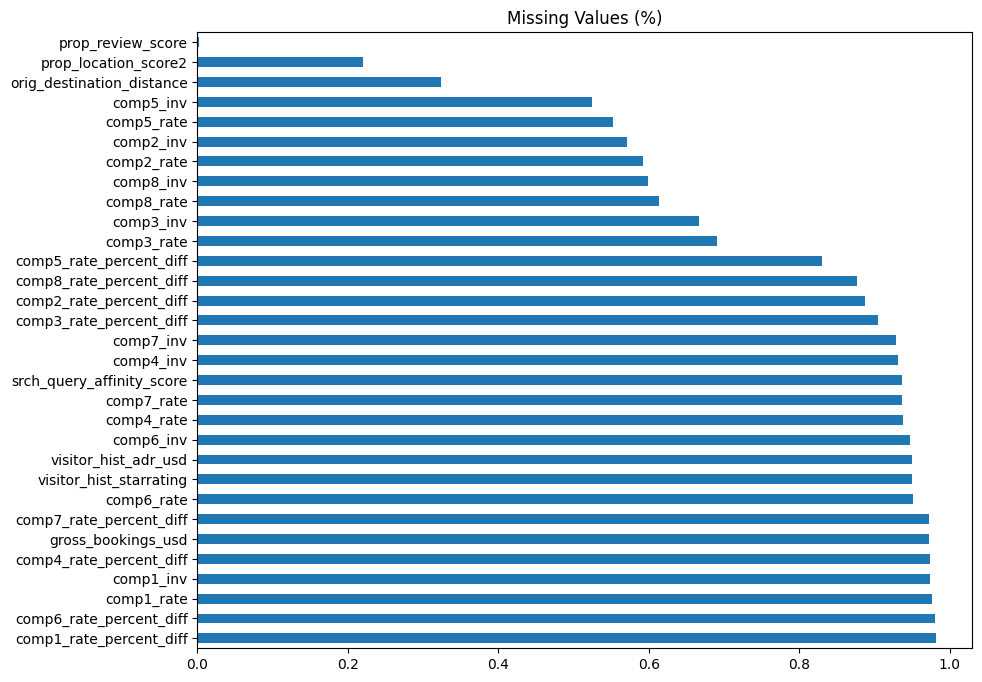

In [8]:
missing = train.isnull().mean().sort_values(ascending=False)
missing[missing > 0].plot(kind='barh', figsize=(10, 8), title='Missing Values (%)')

<Axes: title={'center': 'Search Hour'}, xlabel='search_hour'>

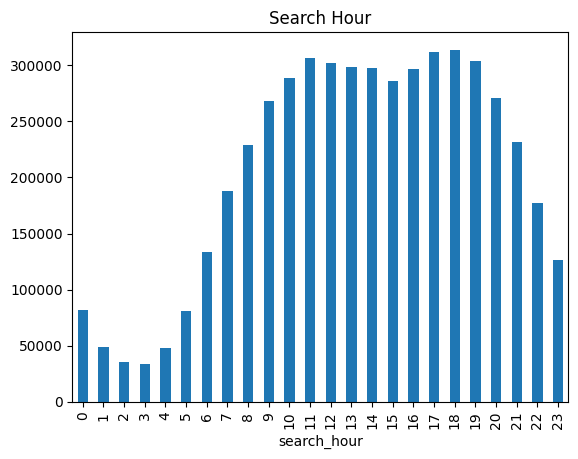

In [9]:
train['date_time'] = pd.to_datetime(train['date_time'])
train['search_month'] = train['date_time'].dt.month
train['search_hour'] = train['date_time'].dt.hour

test['date_time'] = pd.to_datetime(test['date_time'])
test['search_month'] = test['date_time'].dt.month
test['search_hour'] = test['date_time'].dt.hour

train['search_hour'].value_counts().sort_index().plot(kind='bar', title='Search Hour')


Text(0.5, 1.0, 'Hotel Star Rating vs. Price')

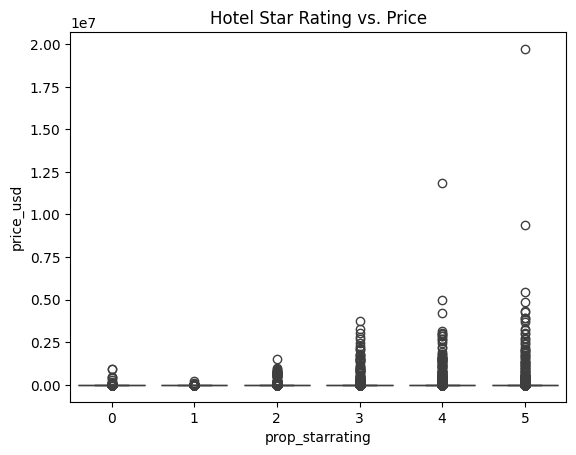

In [10]:
sns.boxplot(data=train, x='prop_starrating', y='price_usd')
plt.title('Hotel Star Rating vs. Price')


<Axes: >

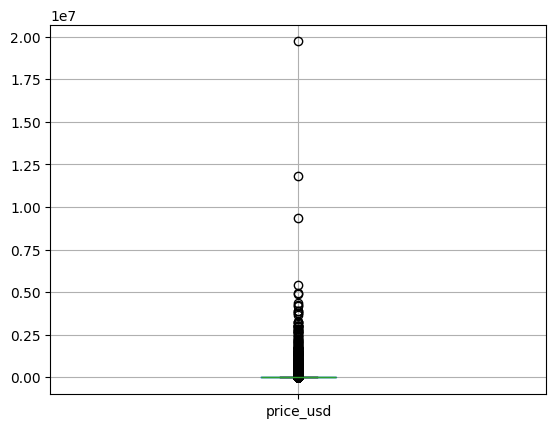

In [11]:
train.boxplot(column='price_usd')


array([[<Axes: title={'center': 'price_usd'}>,
        <Axes: title={'center': 'prop_review_score'}>,
        <Axes: title={'center': 'prop_location_score1'}>],
       [<Axes: title={'center': 'prop_location_score2'}>,
        <Axes: title={'center': 'visitor_hist_starrating'}>,
        <Axes: title={'center': 'visitor_hist_adr_usd'}>],
       [<Axes: title={'center': 'orig_destination_distance'}>,
        <Axes: title={'center': 'position'}>, <Axes: >]], dtype=object)

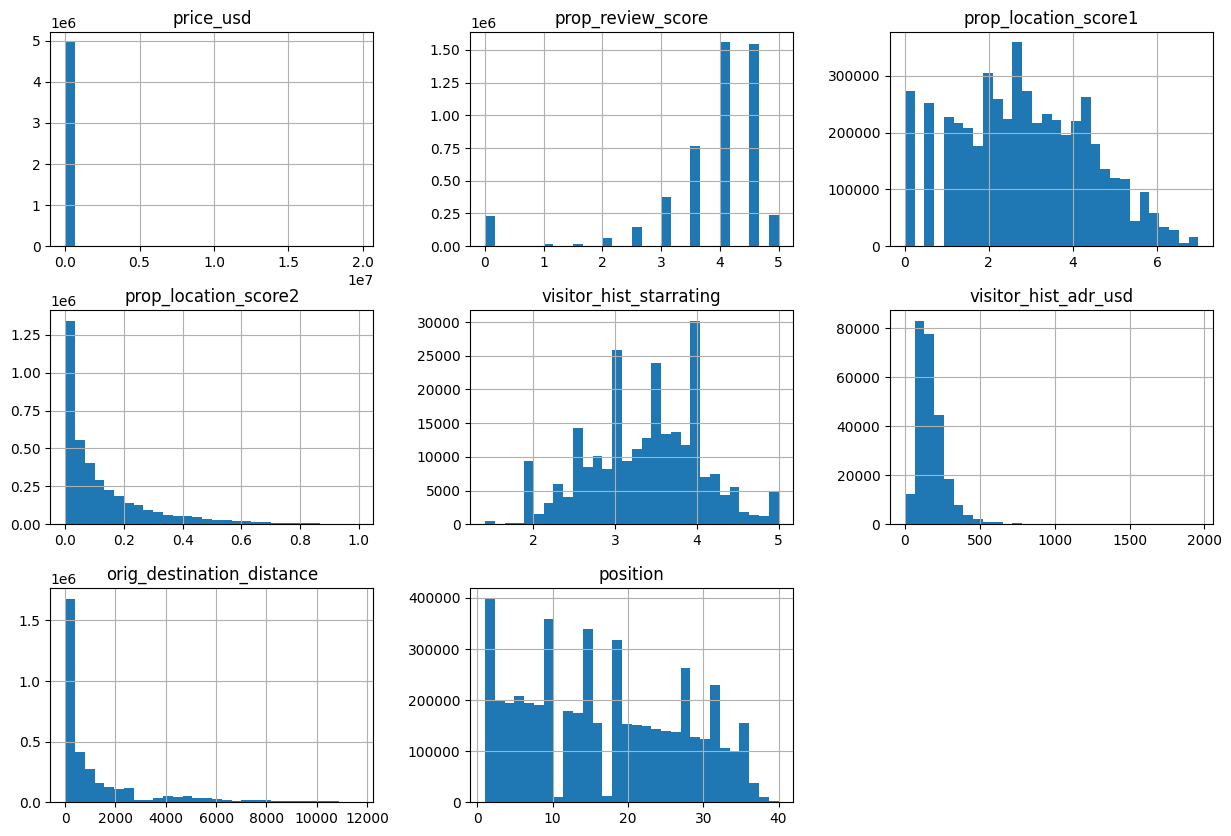

In [12]:
num_cols = ['price_usd', 'prop_review_score', 'prop_location_score1', 'prop_location_score2',
            'visitor_hist_starrating', 'visitor_hist_adr_usd', 'orig_destination_distance', 'position']

train[num_cols].hist(figsize=(15, 10), bins=30)

<Axes: >

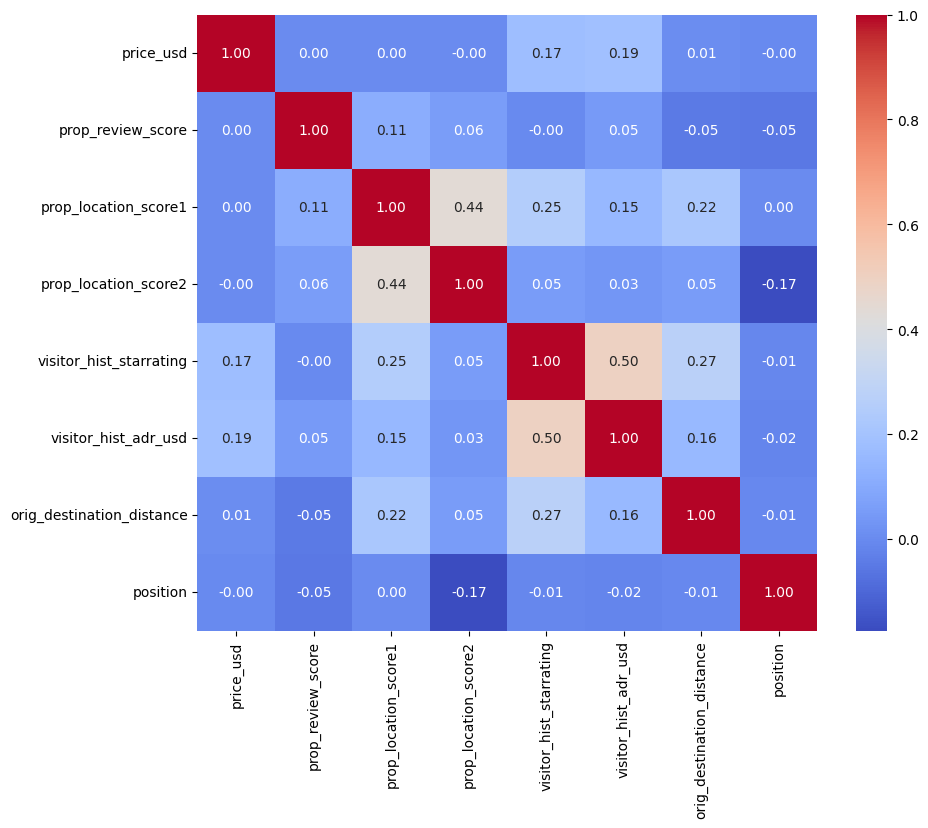

In [13]:
corr = train[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

count    199549.000000
mean         24.851956
std           9.115123
min           5.000000
25%          18.000000
50%          29.000000
75%          32.000000
max          38.000000
Name: prop_id, dtype: float64


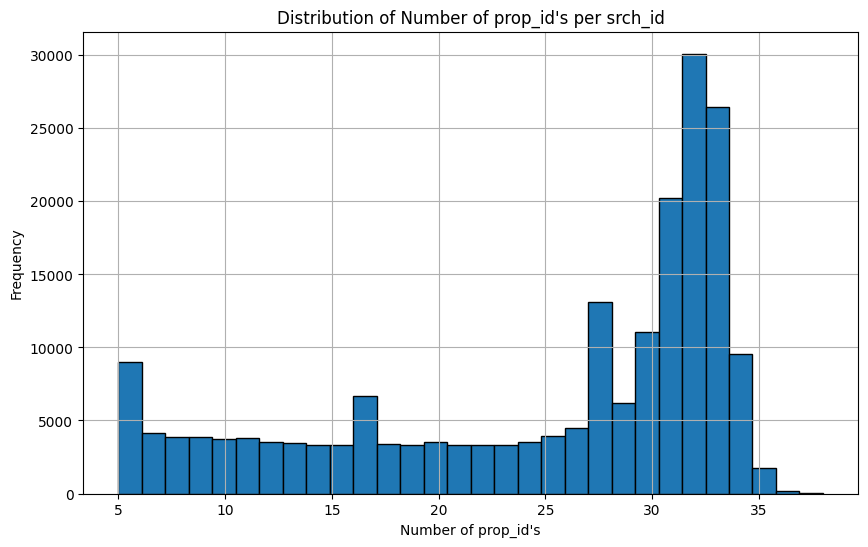

In [14]:
data = pd.read_csv('submission_sample.csv')

srch_id_counts = data.groupby('srch_id')['prop_id'].count()
print(srch_id_counts.describe())
plt.figure(figsize=(10, 6))
srch_id_counts.hist(bins=30, edgecolor='black')
plt.title('Distribution of Number of prop_id\'s per srch_id')
plt.xlabel('Number of prop_id\'s')
plt.ylabel('Frequency')
plt.show()

# Task 3: Data preparation

In [15]:
# affinity, score2 to median, review_score to median


train['srch_query_affinity_score'] = train['srch_query_affinity_score'].fillna(train['srch_query_affinity_score'].median())
train['prop_location_score2'] = train['prop_location_score2'].fillna(train['prop_location_score2'].median())
train['prop_review_score'] = train['prop_review_score'].fillna(train['prop_review_score'].median())

test['srch_query_affinity_score'] = test['srch_query_affinity_score'].fillna(test['srch_query_affinity_score'].median())
test['prop_location_score2'] = test['prop_location_score2'].fillna(test['prop_location_score2'].median())
test['prop_review_score'] = test['prop_review_score'].fillna(test['prop_review_score'].median())


In [16]:
# aggregate comp 1-8 to only best_comp
# 
def calculate_comp_diff(row):
    diffs = []
    for i in range(1, 9):
        rate = row.get(f'comp{i}_rate')
        diff = row.get(f'comp{i}_rate_percent_diff')

        if pd.notnull(rate) and pd.notnull(diff):
            if rate == -1:
                # Competitor better price
                diffs.append(-abs(diff))
            elif rate == +1:
                # Expedia  better price
                diffs.append(abs(diff))
            elif rate == 0:
                # Same price
                diffs.append(0)
    if diffs:
        return min(diffs) 
    else:
        return np.nan

train['comp_diff'] = train.apply(calculate_comp_diff, axis=1)
test['comp_diff'] = test.apply(calculate_comp_diff, axis=1)


cols_to_drop = []
for i in range(1, 9):
    cols_to_drop += [
        f'comp{i}_rate',
        f'comp{i}_inv',
        f'comp{i}_rate_percent_diff'
    ]

train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)

In [17]:
# See % missing
missing = train.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0])

gross_bookings_usd           0.972089
visitor_hist_starrating      0.949204
visitor_hist_adr_usd         0.948977
comp_diff                    0.681247
orig_destination_distance    0.324258
dtype: float64


In [18]:
train['visitor_hist_starrating'] = train['visitor_hist_starrating'].fillna(3.0)
train['visitor_hist_adr_usd'] = train['visitor_hist_adr_usd'].fillna(train['price_usd'].median())
train['comp_diff'] = train['comp_diff'].fillna(0)
train['orig_destination_distance'] = train['orig_destination_distance'].fillna(train['orig_destination_distance'].median())

test['visitor_hist_starrating'] = test['visitor_hist_starrating'].fillna(3.0)
test['visitor_hist_adr_usd'] = test['visitor_hist_adr_usd'].fillna(test['price_usd'].median())
test['comp_diff'] = test['comp_diff'].fillna(0)
test['orig_destination_distance'] = test['orig_destination_distance'].fillna(test['orig_destination_distance'].median())


<Axes: title={'center': 'Missing Values (%)'}>

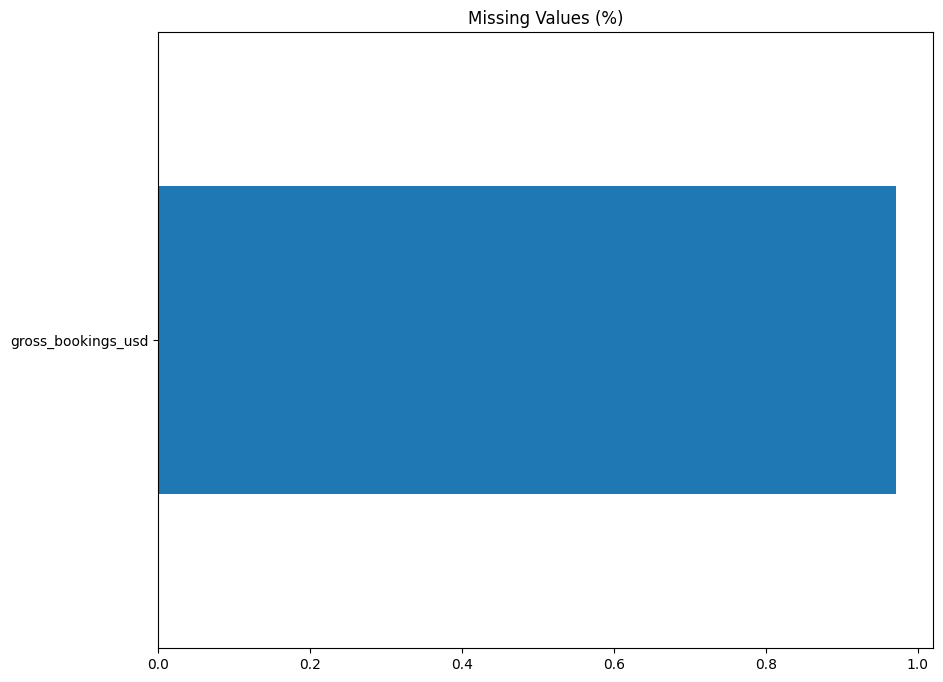

In [19]:
missing = train.isnull().mean().sort_values(ascending=False)
missing[missing > 0].plot(kind='barh', figsize=(10, 8), title='Missing Values (%)')

# SAVE DATA TO PARQUET 

In [20]:
train_dtypes = train.dtypes.rename("train_dtype")
test_dtypes = test.dtypes.rename("test_dtype")
all_dtypes = pd.concat([train_dtypes, test_dtypes], axis=1)

print(all_dtypes)

                                train_dtype      test_dtype
srch_id                               int64           int64
date_time                    datetime64[ns]  datetime64[ns]
site_id                               int64           int64
visitor_location_country_id           int64           int64
visitor_hist_starrating             float64         float64
visitor_hist_adr_usd                float64         float64
prop_country_id                       int64           int64
prop_id                               int64           int64
prop_starrating                       int64           int64
prop_review_score                   float64         float64
prop_brand_bool                       int64           int64
prop_location_score1                float64         float64
prop_location_score2                float64         float64
prop_log_historical_price           float64         float64
position                              int64             NaN
price_usd                           floa

In [22]:
# Save to parquet (preserves dtypes)
train.to_parquet("train_cleaned.parquet", index=False)
test.to_parquet("test_cleaned.parquet", index=False)

In [27]:
search_counts = data.groupby("srch_id").size()

# Calculate the median number of properties per search
median_properties_per_search = search_counts.median()
print(median_properties_per_search)

29.0
